In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('titanic.csv')

In [17]:
# Drop irrelevant columns
data = data.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)

# Fill missing values
data['Age'].fillna(data['Age'].median(), inplace=True)
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)

# Encode categorical features
data['Sex'] = data['Sex'].map({'male': 0, 'female': 1})
data = pd.get_dummies(data, columns=['Embarked'], drop_first=True)

# Normalize continuous features
data['Age'] = (data['Age'] - data['Age'].mean()) / data['Age'].std()
data['Fare'] = (data['Fare'] - data['Fare'].mean()) / data['Fare'].std()

# Separate features and target
X = data.drop('Survived', axis=1).values.astype(np.float64)  # Ensure X is float
y = data['Survived'].values.astype(int)  # Ensure y is int


# Split data into training and test sets (80-20 split)
split_index = int(0.8 * len(X))
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

In [19]:
# Logistic Regression Implementation
class LogisticRegression:
    def __init__(self, learning_rate=0.01, num_iterations=1000):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.weights = None
        self.bias = None

    def sigmoid(self, z):
        z = np.asarray(z, dtype=np.float64)  # Ensure z is of type float
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y):
        num_samples, num_features = X.shape
        self.weights = np.zeros(num_features, dtype=np.float64)  # Ensure weights are float
        self.bias = 0.0  # Initialize bias as float

        for _ in range(self.num_iterations):
            linear_model = np.dot(X, self.weights) + self.bias
            y_predicted = self.sigmoid(linear_model)

            # Gradient Descent
            dw = (1 / num_samples) * np.dot(X.T, (y_predicted - y))
            db = (1 / num_samples) * np.sum(y_predicted - y)

            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        y_predicted = self.sigmoid(linear_model)
        y_predicted_class = [1 if i > 0.5 else 0 for i in y_predicted]
        return np.array(y_predicted_class)


In [21]:
# Train the model
model = LogisticRegression(learning_rate=0.1, num_iterations=1000)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
def accuracy(y_true, y_pred):
    return np.sum(y_true == y_pred) / len(y_true)

accuracy_score = accuracy(y_test, y_pred)
print(f'Accuracy: {accuracy_score:.4f}')
# Precision and Recall calculation
def precision(y_true, y_pred):
    true_positive = np.sum((y_true == 1) & (y_pred == 1))
    false_positive = np.sum((y_true == 0) & (y_pred == 1))
    return true_positive / (true_positive + false_positive) if (true_positive + false_positive) > 0 else 0

def recall(y_true, y_pred):
    true_positive = np.sum((y_true == 1) & (y_pred == 1))
    false_negative = np.sum((y_true == 1) & (y_pred == 0))
    return true_positive / (true_positive + false_negative) if (true_positive + false_negative) > 0 else 0

# Calculate and print precision and recall
precision_score = precision(y_test, y_pred)
recall_score = recall(y_test, y_pred)

print(f'Precision: {precision_score:.4f}')
print(f'Recall: {recall_score:.4f}')


Accuracy: 0.8324
Precision: 0.8148
Recall: 0.6875


Predicted    0   1  All
Actual                 
0          105  10  115
1           20  44   64
All        125  54  179


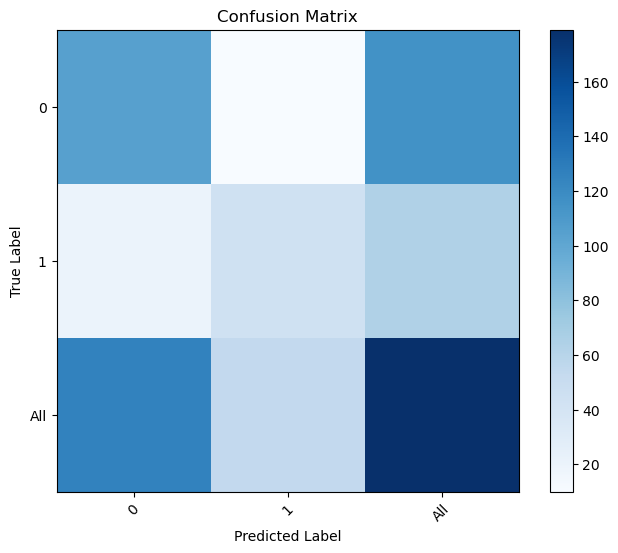

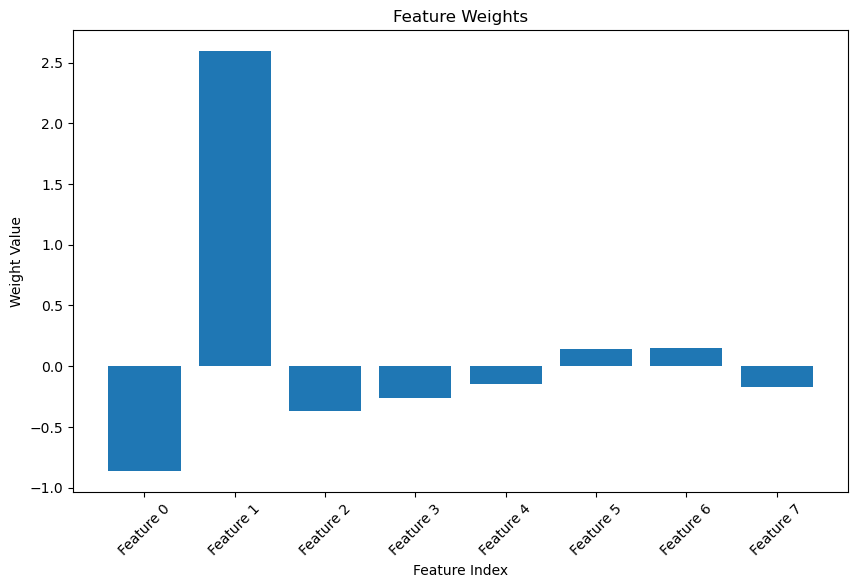

In [23]:
# Confusion Matrix
def confusion_matrix(y_true, y_pred):
    cm = pd.crosstab(y_true, y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)
    return cm

cm = confusion_matrix(y_test, y_pred)
print(cm)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(cm))
plt.xticks(tick_marks, cm.columns, rotation=45)
plt.yticks(tick_marks, cm.index)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Visualize the feature
plt.figure(figsize=(10, 6))
plt.bar(range(len(model.weights)), model.weights)
plt.title('Feature Weights')
plt.xlabel('Feature Index')
plt.ylabel('Weight Value')
plt.xticks(range(len(model.weights)), [f'Feature {i}' for i in range(len(model.weights))], rotation=45)
plt.show()


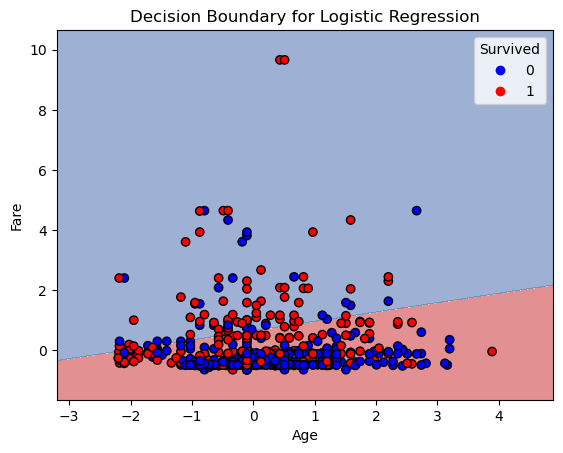

   Survived  Pclass  Sex       Age  SibSp  Parch      Fare  Embarked_Q  \
0         0       3    0 -0.565419      1      0 -0.502163       False   
1         1       1    1  0.663488      1      0  0.786404       False   
2         1       3    1 -0.258192      0      0 -0.488580       False   
3         1       1    1  0.433068      1      0  0.420494       False   
4         0       3    0  0.433068      0      0 -0.486064       False   

   Embarked_S  
0        True  
1       False  
2        True  
3        True  
4        True  


In [45]:
# Visualize decision boundary for two features (Age and Fare)
def plot_decision_boundary(X, y, model):
    # Set min and max values for the features for the grid
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    
    # Use model to predict over the grid
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, alpha=0.5, cmap=plt.cm.RdYlBu)
    scatter = plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.bwr, edgecolor='k')
    plt.xlabel('Age')
    plt.ylabel('Fare')
    plt.legend(*scatter.legend_elements(), title="Survived")
    plt.title('Decision Boundary for Logistic Regression')
    plt.show()

# Select only 'Age' and 'Fare' for decision boundary visualization
X_train_subset = X_train[:, [2, 5]]  # Assuming Age and Fare are in these columns
model.fit(X_train_subset, y_train)  # Train on selected features
plot_decision_boundary(X_train_subset, y_train, model)
# Convert NumPy array to DataFrame
data_df = pd.DataFrame(data)

# Now you can use head()
print(data_df.head())
